In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import string
import warnings

In [5]:
def read_data(n, alpha, beta, c):
    print(c)
    df_true = pd.read_csv(f'experiments_results/fld_a={alpha}b={beta}_c={c}_xmax=30.0.csv')
    df_est = pd.read_csv(f'experiments_results/fld_n={n}_a={alpha}b={beta}_c={c}_xmax=30.0.csv')
    # df_true = pd.read_csv(f'~/Downloads/cc_20241129/experiments_results/fld_a={alpha}b={beta}_c={c}_xmax=30.0.csv')
    # df_est = pd.read_csv(f'~/Downloads/cc_20241129/experiments_results/fld_n={n}_a={alpha}b={beta}_c={c}_xmax=30.0_test_kb_b10_wl.csv')
    return df_true, df_est

def get_data(df_est, df_true, x = 5, index='qDI'):
    df_est_x = df_est[df_est['xs'] == x].copy()
    df_ = {}
    for id, dat in enumerate(df_est_x.items()):
        col = dat[0]
        if col == 'xs':
            continue
        if 'WL2' in col:
            continue
        if 'KB82_iso' in col:
            continue
        which_I = None
        if index not in col:
            continue
        y = df_est_x[col]
        ytrue = df_true[df_true['xs'] == x][index].item()
        y = y - ytrue
        df_[col.replace(f'{index}_','')] = y
    df_ = pd.DataFrame(df_)
    return df_

# Save boxplots

In [6]:
def make_plot(n, alpha, beta, c):
    xs = [1, 5, 10, 20, 25, 30]
    df_true, df_est = read_data(n=n, alpha=alpha, beta=beta, c=c)
    df_true['xs'] = df_true['xs'] * c
    df_est['xs'] = df_est['xs'] * c
    xs = [x * c for x in xs]
    fig, axs = plt.subplots(2, len(xs), figsize=(4*len(xs), 4*2))
    fig.tight_layout(pad=3.0)
    for xid, x in enumerate(xs):
        df_qDI = get_data(df_est=df_est, df_true=df_true, x=x, index='qDI')
        df_qZI = get_data(df_est=df_est, df_true=df_true, x=x, index='qZI')
        sns.boxplot(df_qDI, ax=axs[0, xid])
        sns.boxplot(df_qZI, ax=axs[1, xid])
        axs[0, xid].set_title(f'$\kappa$={x}', fontsize=24)
    for ax in fig.get_axes():
        ax.axhline(y=0, color='r', linestyle='-')
    for ax in axs[1, :]:
        ax.tick_params(axis="x", rotation=90, labelsize=20)
        ax.tick_params(axis="y", labelsize=20)
        ax.set_xticklabels(['IOQR', 'IAQR', 'BK', 'BRW', 'WL1', 'CQR'])
    for ax in axs[0, :]:
        ax.get_xaxis().set_visible(False)
        ax.tick_params(axis="y", labelsize=20)
    axs[0, 0].set_ylabel('qDI error', fontsize=24)
    axs[1, 0].set_ylabel('qZI error', fontsize=24)
    filename = f'errors_n={n}_alpha={alpha}_beta={beta}_c={c}.pdf'
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

In [7]:
# generate boxplots and save them to the files

for n in [50, 100, 500, 1000]:
    make_plot(n=n, alpha=0.5, beta=0.1, c=0.1)
    make_plot(n=n, alpha=0.5, beta=0.5, c=0.1)
    make_plot(n=n, alpha=0.5, beta=0.1, c=1.0)
    make_plot(n=n, alpha=0.5, beta=0.2, c=1.0)
    make_plot(n=n, alpha=0.5, beta=0.1, c=0.5)
    make_plot(n=n, alpha=0.5, beta=0.5, c=0.5)
    make_plot(n=n, alpha=0.5, beta=0.05, c=0.2)
    make_plot(n=n, alpha=0.5, beta=0.2, c=0.1)
    make_plot(n=n, alpha=0.5, beta=0.2, c=0.3)

0.1


/var/folders/q6/ndvm27kj6bq8rql54t3fyjr80000gn/T/ipykernel_31953/1335166254.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['IOQR', 'IAQR', 'BK', 'BRW', 'WL1', 'CQR'])


0.1


/var/folders/q6/ndvm27kj6bq8rql54t3fyjr80000gn/T/ipykernel_31953/1335166254.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['IOQR', 'IAQR', 'BK', 'BRW', 'WL1', 'CQR'])


0.1


/var/folders/q6/ndvm27kj6bq8rql54t3fyjr80000gn/T/ipykernel_31953/1335166254.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['IOQR', 'IAQR', 'BK', 'BRW', 'WL1', 'CQR'])


0.1


/var/folders/q6/ndvm27kj6bq8rql54t3fyjr80000gn/T/ipykernel_31953/1335166254.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['IOQR', 'IAQR', 'BK', 'BRW', 'WL1', 'CQR'])


# Save MSE tables

In [17]:
def make_mse_table(params_lists):
    xs = [1, 5, 10, 15, 20, 25, 30]
    n, alpha, beta, c = params_lists
    df_true, df_est = read_data(n=n, alpha=alpha, beta=beta, c=c)
    mses_qdi=[]
    mses_qzi=[]
    for xid, x in enumerate(xs):
        df_qDI = get_data(df_est=df_est, df_true=df_true, x=x, index='qDI')
        df_qZI = get_data(df_est=df_est, df_true=df_true, x=x, index='qZI')
        mse_qdi = np.round(np.array([np.mean(df_qDI[col]**2) for col in df_qDI.columns])*1000,3)
        mse_qzi = np.round(np.array([np.mean(df_qZI[col]**2) for col in df_qZI.columns])*1000,3)
        mses_qdi.append(mse_qdi)
        mses_qzi.append(mse_qzi)
    mses_qdi_df=pd.DataFrame({str(xs[i]):mses_qdi[i] for i in range(len(xs))})
    mses_qdi_df['method'] = list(df_qDI.columns)
    mses_qdi_df=mses_qdi_df.set_index('method')
    mses_qzi_df=pd.DataFrame({str(xs[i]):mses_qzi[i] for i in range(len(xs))})
    mses_qzi_df['method'] = list(df_qZI.columns)
    mses_qzi_df=mses_qzi_df.set_index('method')
    mses_qdi_df.to_csv(f'mse_n={n}_alpha={alpha}_beta={beta}_c={c}_qDI.csv')
    mses_qzi_df.to_csv(f'mse_n={n}_alpha={alpha}_beta={beta}_c={c}_qZI.csv')
    return(mses_qdi_df, mses_qzi_df)

In [ ]:
# generate MSE tables and save them to the files

for n in [50, 100, 500, 1000]:
    make_mse_table([n, 0.5, 0.2, 0.1])
    make_mse_table([n, 0.5, 0.2, 1.0])
    make_mse_table([n, 0.5, 0.1, 1.0])
    make_mse_table([n, 0.5, 0.1, 0.1])
    make_mse_table([n, 0.5, 0.2, 0.3])
    make_mse_table([n, 0.5, 0.5, 0.5])
    make_mse_table([n, 0.5, 0.5, 0.1])
    make_mse_table([n, 0.5, 0.1, 0.5])
    make_mse_table([n, 0.5, 0.05, 0.2])

# Generate heatmaps

In [10]:
methods_names = {'iso_qr':'IOQR', 'iso_tau_IQR':'IAQR', 'KB82':'BK', 'b10':'BRW', 
                 'WL1':'WL1', 'qrfnc_R':'CQR'}
# methods_names = {'iso_qr':'IOQR', 'iso_tau_IQR':'IAQR', 'KB82':'BK', 'b10':'BRW', 
#                  'WL1':'WL1', 'WL2':'WL2', 'qrfnc_R':'CQR'}
ns = [50, 100, 500, 1000]
parameters_sets = [(0.5, 0.05, 0.2), (0.5, 0.1, 0.1), (0.5, 0.1, 0.5), 
                   (0.5, 0.1, 1.0), (0.5, 0.2, 0.1), (0.5, 0.2, 0.3),
                  (0.5, 0.2, 1.0), (0.5, 0.5, 0.1), (0.5, 0.5, 0.5)]
def prepare_data_for_heatmap(ns, parameters_sets):
    df = pd.DataFrame()
    for n in ns:
        for i in range(len(parameters_sets)):
            letters_string = string.ascii_lowercase
            pars_set_label = letters_string[i]
            pars_set = parameters_sets[i]
            for conc_index in ['qZI', 'qDI']:
                alpha, beta, c = pars_set
                mse_test = pd.read_csv(f'mse_n={n}_alpha={alpha}_beta={beta}_c={c}_'+conc_index+'.csv')
                # mse_test = pd.read_csv(f'mse_n={n}_alpha={alpha}_beta={beta}_c={c}_'+conc_index+'_kb_b10_wl.csv')
                mse_test['method'] = [meth[0:-4] for meth in mse_test['method']]
                mse_test = mse_test.replace(methods_names)
                mse_test = mse_test.set_index(['method']).stack()
                mse_test = pd.DataFrame(mse_test).reset_index()
                mse_test = mse_test.rename(columns = {'level_1':'x',0:'MSE'})
                mse_test['index'] = [conc_index] * 7 * len(methods_names)
                mse_test['n'] = [n] * 7 * len(methods_names)
                mse_test['pars_set'] = [pars_set_label] * 7 * len(methods_names)
                mse_test['lowest_mse'] = [np.min(mse_test[mse_test['x'] == mse_test['x'][i]]['MSE']) for i in range(7 * len(methods_names))]
                df = pd.concat([df, mse_test])
    return df

In [11]:
mses_df = prepare_data_for_heatmap(ns, parameters_sets)

In [12]:
mses_df['mse_ratio'] = mses_df['MSE'] / mses_df['lowest_mse']
mses_df['x'] = [int(xx) for xx in mses_df['x']]

In [13]:
mses_df = mses_df.rename(columns={'index':'conc_index'})

In [15]:
warnings.filterwarnings('ignore')
methods = ['IOQR', 'IAQR', 'BRW', 'WL1', 'BK', 'CQR']

fig, axs = plt.subplots(2, 3, figsize=(9, 9))
for i, ax in enumerate(axs.flat):  # Flatten the axes array for easy iteration
    method = methods[i]
    mses_df_method = mses_df[mses_df['method'] == method]
    mses_df_method['x_labels'] = list(zip(mses_df_method['conc_index'], mses_df_method['x']))
    mses_df_method['y_labels'] = list(zip(mses_df_method['n'], mses_df_method['pars_set']))
    heatmap_data = mses_df_method.pivot(index='y_labels', columns='x_labels', values='mse_ratio')
    heatmap_data = heatmap_data.rename(columns={hdc:hdc[1] for hdc in heatmap_data.columns})
    sns.heatmap(heatmap_data, cmap="Reds", cbar_kws={'label': ''}, 
                vmin=1, vmax=3, ax=axs[int(i/3), i%3])
    ax.set_title(method)  # Add a title to the current heatmap
    ax.tick_params(left = False, right = False, labelleft = False, 
                labelbottom = True, bottom = False, labelsize=6, length=0)
    ax.set_xticks(np.arange(14))
    list_of_xticks = [1,5,10,15,20,25,30]
    ax.set_xticklabels(["      "+str(i) for i in list_of_xticks]*2)
    ax_top = ax.twiny()
    ax_top.tick_params(left = False, right = False, labelleft = False, 
            labelbottom = False, bottom = False, top = False, labeltop = False, length=0)
    ax_top.set_xlabel("qDI                    qZI")
    ax.set_xlabel("x")
    ax.set_ylabel("n=1000         n=500           n=100          n=50")
    ax.hlines([9, 18, 27], *ax.get_xlim(), colors='black', linewidth=1.5)  # Horizontal lines
    ax.vlines([7], *ax.get_ylim(), colors='black', linewidth=1.5)  # Vertical lines

# Adjust layout
plt.tight_layout()
filename = f'heatmaps_mse_separated.pdf'
plt.savefig(filename)
# plt.show()
plt.close()

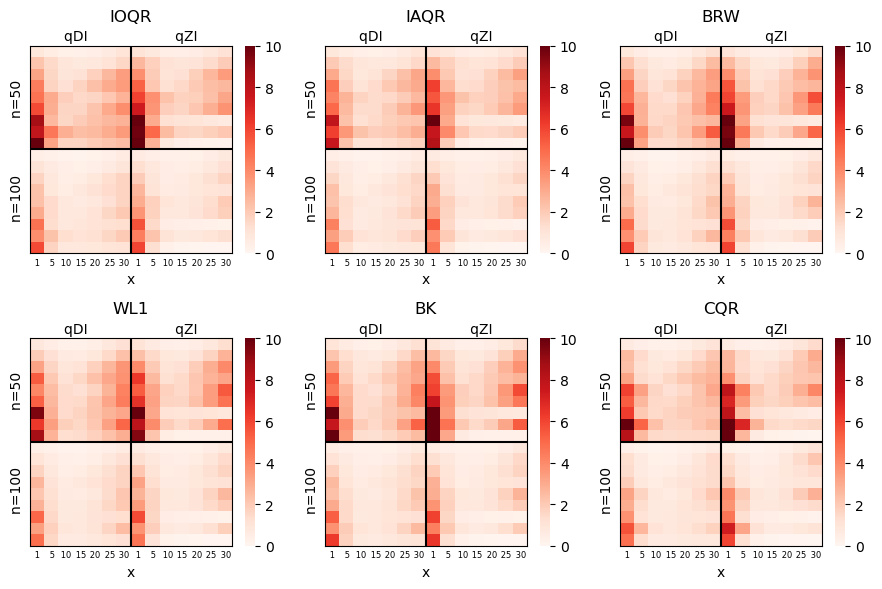

In [74]:
warnings.filterwarnings('ignore')
methods = ['IOQR', 'IAQR', 'BRW', 'WL1', 'BK', 'CQR']

fig, axs = plt.subplots(2, 3, figsize=(9, 6))
for i, ax in enumerate(axs.flat):  # Flatten the axes array for easy iteration
    method = methods[i]
    mses_df_method = mses_df[mses_df['method'] == method]
    mses_df_method = mses_df_method[mses_df_method['n'] < 120]
    mses_df_method['x_labels'] = list(zip(mses_df_method['conc_index'], mses_df_method['x']))
    mses_df_method['y_labels'] = list(zip(mses_df_method['n'], mses_df_method['pars_set']))
    heatmap_data = mses_df_method.pivot(index='y_labels', columns='x_labels', values='MSE')
    heatmap_data = heatmap_data.rename(columns={hdc:hdc[1] for hdc in heatmap_data.columns})
    sns.heatmap(heatmap_data, cmap="Reds", cbar_kws={'label': ''}, 
                vmin=0, vmax=10, ax=axs[int(i/3), i%3])
    ax.set_title(method)  # Add a title to the current heatmap
    ax.tick_params(left = False, right = False, labelleft = False, 
                labelbottom = True, bottom = False, labelsize=6, length=0)
    ax.set_xticks(np.arange(14))
    list_of_xticks = [1,5,10,15,20,25,30]
    ax.set_xticklabels(["      "+str(i) for i in list_of_xticks]*2)
    ax_top = ax.twiny()
    ax_top.tick_params(left = False, right = False, labelleft = False, 
            labelbottom = False, bottom = False, top = False, labeltop = False, length=0)
    ax_top.set_xlabel("qDI                    qZI")
    ax.set_xlabel("x")
    ax.set_ylabel("n=100             n=50")
    
    ax.hlines([9], *ax.get_xlim(), colors='black', linewidth=1.5)  # Horizontal lines
    ax.vlines([7], *ax.get_ylim(), colors='black', linewidth=1.5)  # Vertical lines

# Adjust layout
plt.tight_layout()
filename = f'heatmaps_mse_separated_values.pdf'
plt.savefig(filename)
plt.show()
plt.close()

In [18]:
qDI_MSE = pd.concat([make_mse_table([100, 0.5, 0.2, 0.1])[0], 
           make_mse_table([100, 0.5, 0.2, 0.3])[0],
            make_mse_table([100, 0.5, 0.5, 0.5])[0],
            make_mse_table([100, 0.5, 0.5, 0.1])[0],
            make_mse_table([100, 0.5, 0.1, 0.5])[0]])
qZI_MSE = pd.concat([make_mse_table([100, 0.5, 0.2, 0.1])[1], 
           make_mse_table([100, 0.5, 0.2, 0.3])[1],
            make_mse_table([100, 0.5, 0.5, 0.5])[1],
            make_mse_table([100, 0.5, 0.5, 0.1])[1],
            make_mse_table([100, 0.5, 0.1, 0.5])[1]])
n=100
qDI_MSE.to_excel(f'mse_n={n}_qDI.xlsx')
qZI_MSE.to_excel(f'mse_n={n}_qZI.xlsx')

0.1
0.3
0.5
0.1
0.5
0.1
0.3
0.5
0.1
0.5
